In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Import Titanic Training data
df = pd.read_csv('train.csv')

In [4]:
# Titanic Training data top 5 values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# No. of records (rows) and columns
df.shape

(891, 12)

In [6]:
# Data type for columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Columns headings
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.Survived = df.Survived.astype('category')
df.Pclass = df.Pclass.astype('category')
df.PassengerId = df.PassengerId.astype('category')

In [10]:
df.dtypes['Survived']

CategoricalDtype(categories=[0, 1], ordered=False)

In [11]:
# In order to extract catagories
df['Survived'].value_counts().keys()

CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category')

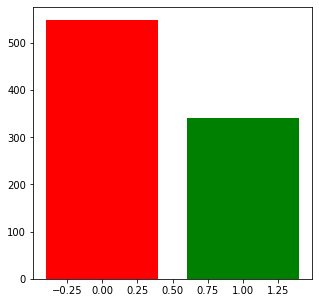

In [12]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Survived'].value_counts().keys()),list(df['Survived'].value_counts()),color=['r','g'])
plt.show()

In [98]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df[]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pclass')

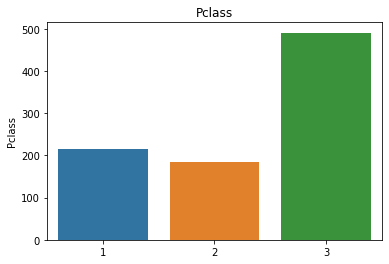

In [100]:
sns.barplot(df['Pclass'].value_counts().index,df['Pclass'].value_counts()).set_title('Pclass')

In [14]:
df['Pclass'].value_counts().keys()

CategoricalIndex([3, 1, 2], categories=[1, 2, 3], ordered=False, dtype='category')

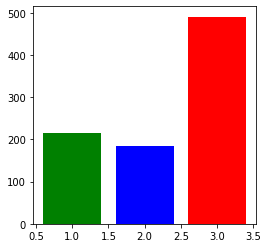

In [15]:
plt.figure(figsize=(4,4))
plt.bar(list(df['Pclass'].value_counts().keys()),list(df['Pclass'].value_counts()),color=['r','g','b'])
plt.show()

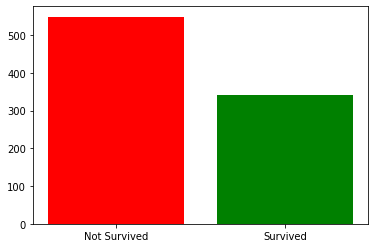

In [16]:
fig, ax = plt.subplots(1,1)
survived = ['Not Survived', 'Survived']
values = [df['Survived'].value_counts()[0], df['Survived'].value_counts()[1]]
ax.bar(survived,values,color=['r','g'])
plt.show()

Text(0, 0.5, 'Count')

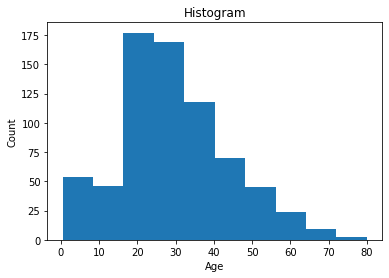

In [17]:
# Plotting histogram using Matplotlib
plt.hist(df.Age);
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Count')

<AxesSubplot:xlabel='Age', ylabel='Count'>

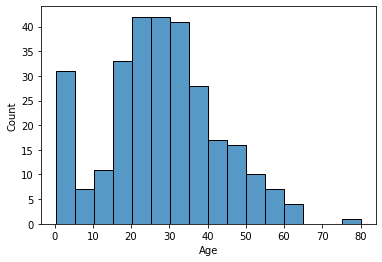

In [26]:
# Plotting using Seaborn
sns.histplot(df.loc[df['Survived'] == 1, 'Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

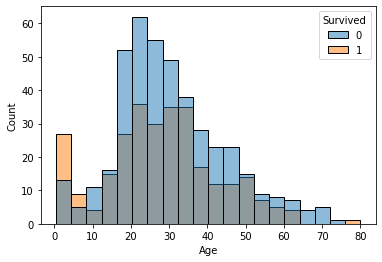

In [ ]:
sns.histplot(data=df, x='Age', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

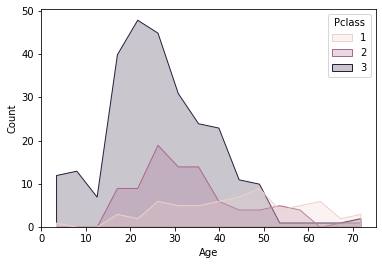

In [31]:
sns.histplot(data=df[df['Survived']==0], x="Age", hue='Pclass', element='poly')

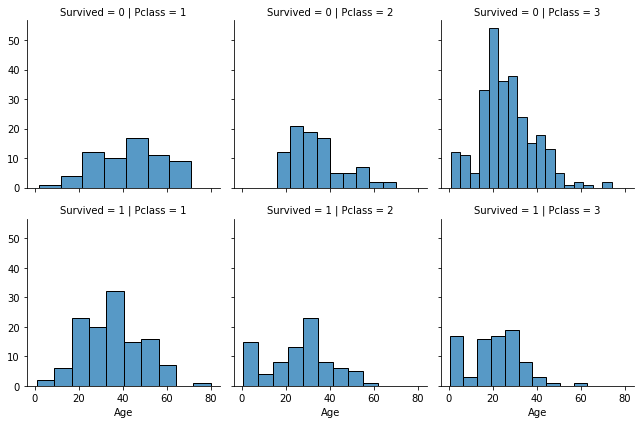

In [ ]:
g = sns.FacetGrid(df, row='Survived', col='Pclass')
g.map(sns.histplot, 'Age')
plt.show()

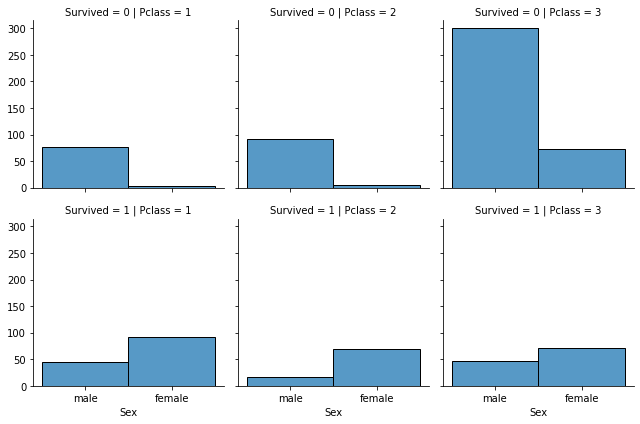

In [21]:
g = sns.FacetGrid(df, row='Survived', col='Pclass')
g.map(sns.histplot, "Sex")
plt.show()

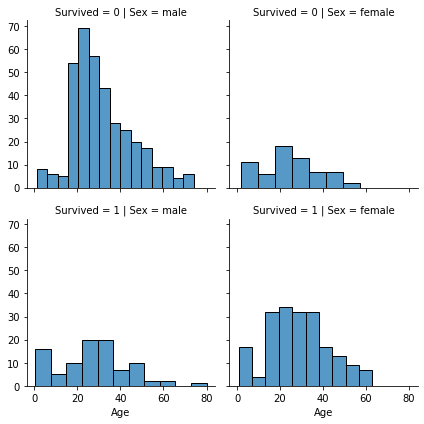

In [24]:
g = sns.FacetGrid(df, row='Survived', col='Sex')
g.map(sns.histplot, 'Age')
plt.show()

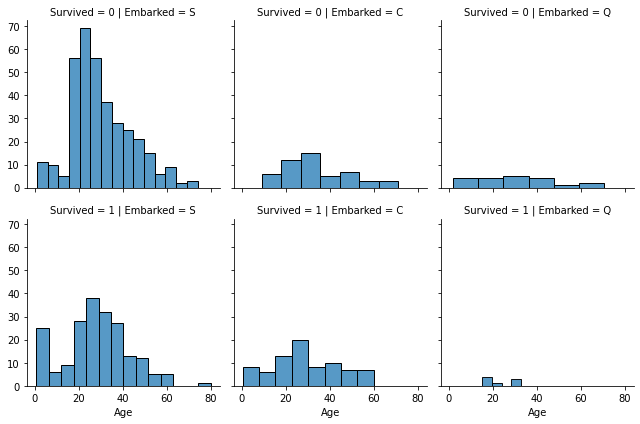

In [118]:
g = sns.FacetGrid(df, row='Survived', col='Embarked')
g.map(sns.histplot, 'Age')
plt.show()

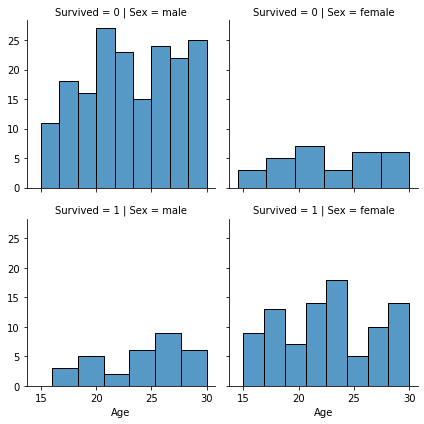

In [39]:
g = sns.FacetGrid(df.loc[((df['Age'] > 0) & (df['Age'] <=10))] , row='Survived', col='Sex')
g.map(sns.histplot, 'Age')
plt.show()

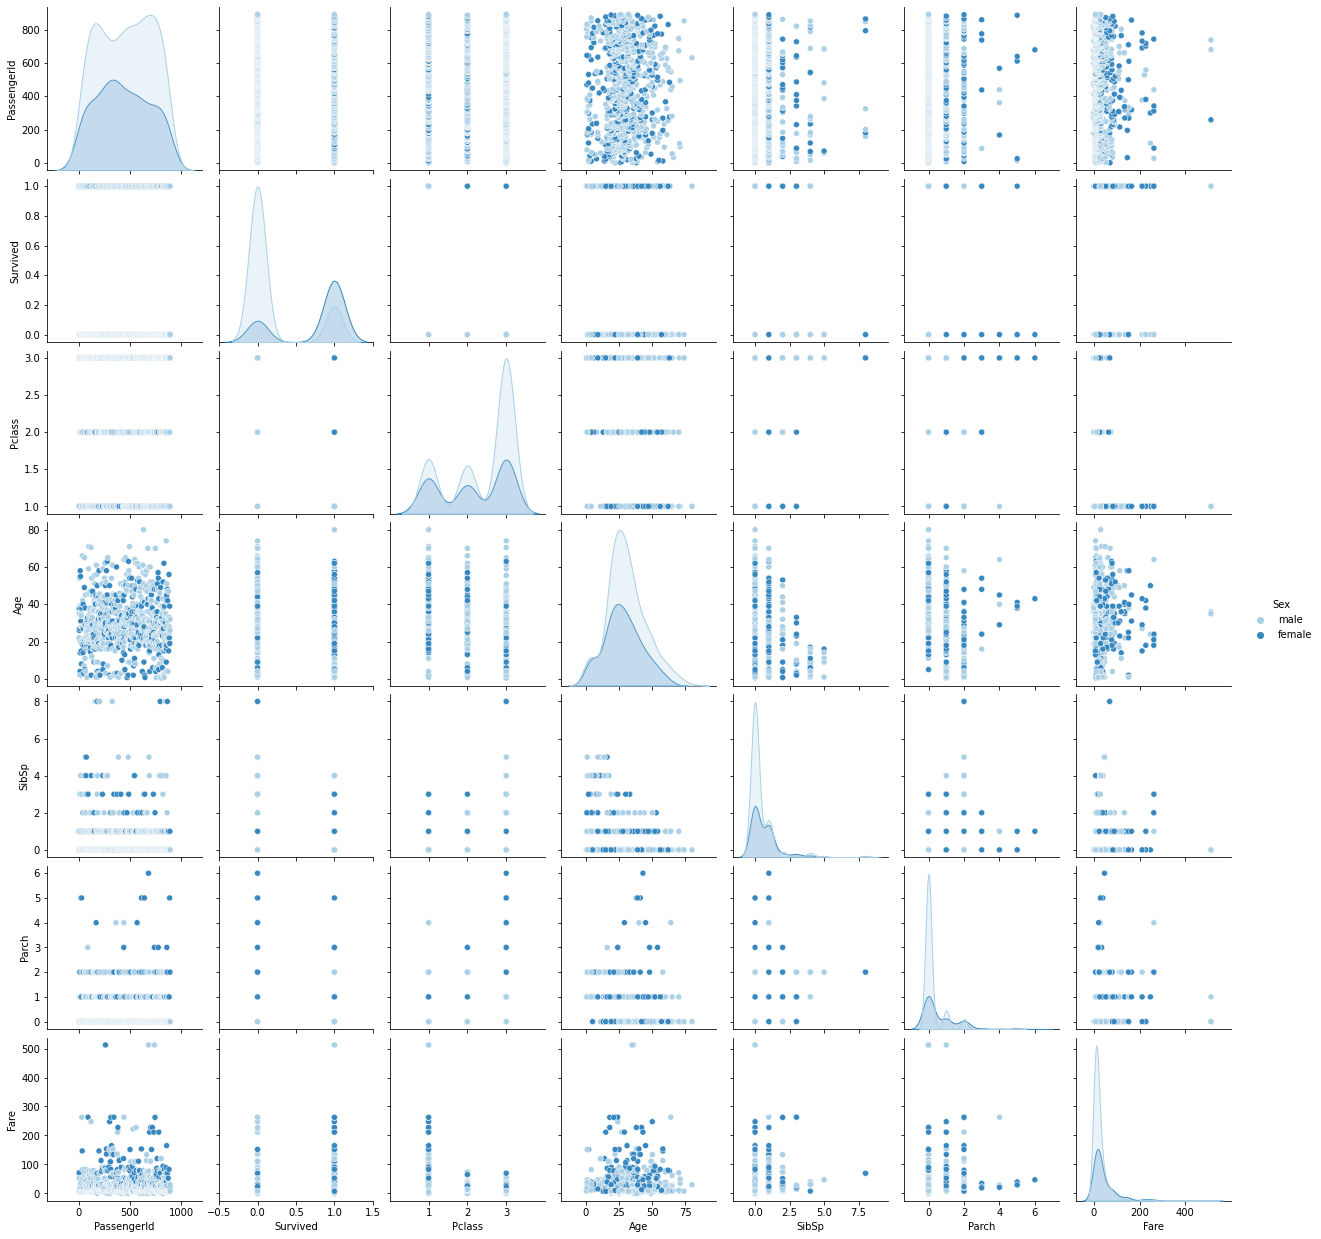

In [41]:
# a- Distribution Plot (Pair Plot)
sns.pairplot(df, hue = 'Sex', palette = 'Blues')

<AxesSubplot:xlabel='Survived', ylabel='count'>

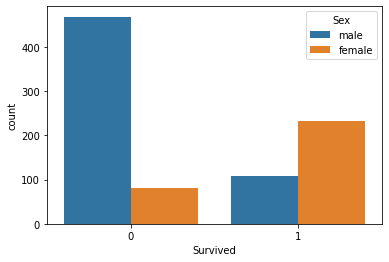

In [117]:
# Count plot
sns.countplot(x='Survived', data=df, hue='Sex', dodge=True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

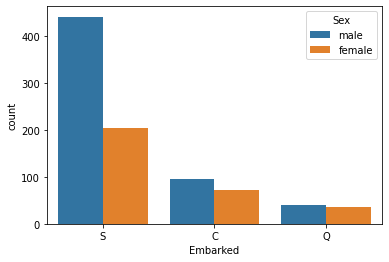

In [113]:
sns.countplot(x='Embarked', data=df, hue='Sex', dodge=True)

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

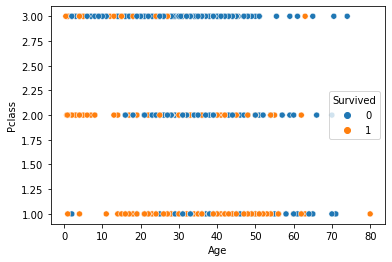

In [56]:
sns.scatterplot(data=df, x='Age', y='Pclass', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

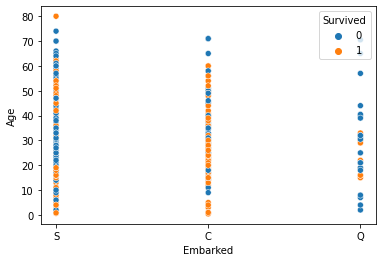

In [114]:
sns.scatterplot(data=df, x='Embarked', y='Age', hue='Survived')

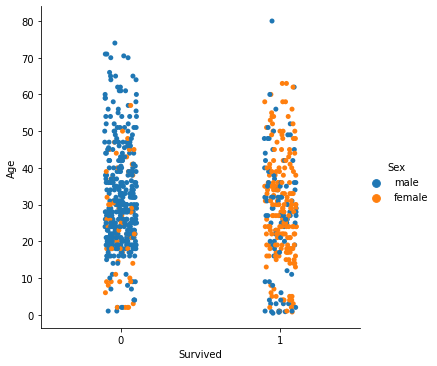

In [61]:
sns.catplot(x="Survived", y="Age", hue="Sex", data=df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

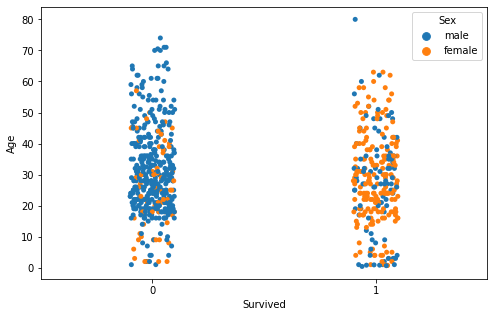

In [96]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Survived', y='Age', hue='Sex', data=df)